<a href="https://colab.research.google.com/github/SachinBiswas7/Bangla-Emotion-Classification/blob/main/bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Dataset.csv")

In [ ]:
df.head()

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,2016,NaN,NaN,NaN
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,2016,NaN,NaN,NaN
2,3,angry,ভেজাল নির্বাচন ।,2016,NaN,NaN,NaN
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2016,NaN,NaN,NaN
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",2016,NaN,NaN,NaN


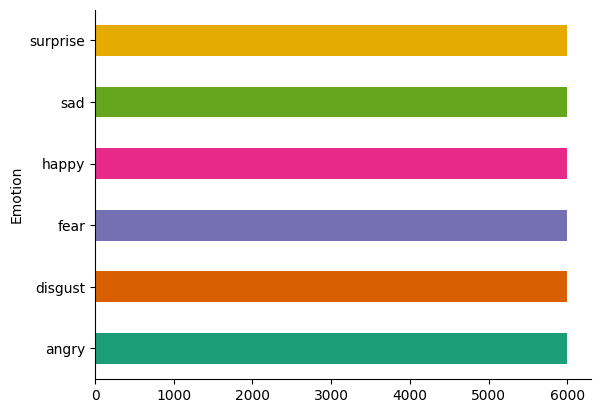

In [ ]:
# @title Emotion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Emotion_label'] = le.fit_transform(df['Emotion'])


In [ ]:
#drop Racial biases
df.drop(['Racial Biases'], axis=1, inplace=True)
#drop Hatred Percentage
df.drop(['Hatred Percentage',], axis=1, inplace=True)
#drop Depression Percentage
df.drop(['Depression Percentage'], axis=1, inplace=True)
#drop year
df.drop(['Year'], axis=1, inplace=True)


In [ ]:
#data preprocessing using spacy

#removing unnecessary punctuation
import re

# Data cleaning function
def process_comments(Comment):
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

df['Cleaned'] = df['Text'].apply(process_comments)
df.head()


,SL,Emotion,Text,Emotion_label,Cleaned
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...


In [ ]:
import pandas as pd

# Load Bengali stop words from a CSV file
stop_words_df = pd.read_csv('stopwords_bangla.csv')  # Assuming the CSV has one column with stop words
stop_words_df=stop_words_df.drop(['Unnamed: 0'], axis=1)
# Convert the stop words to a list
stop_words_list = stop_words_df.iloc[:, 0].tolist()  # Convert the column to a list

# Check the stop words list
print("Stop words list:", stop_words_list[:10])  # Print first 10 stop words for verification


# Function to remove stop words
def remove_stop_words(text, stop_words):
    if isinstance(text, str):  # Ensure the text is a string
        # Tokenize text (simple split for Bengali)
        words = text.split()
        # Filter out stop words
        filtered_words = [word for word in words if word not in stop_words]
        # Join words back into a single string
        return ' '.join(filtered_words)
    else:
        return text  # If text is not a string, return it as is

# Assuming 'df' is the DataFrame and 'Cleaned' is the column with text data
# Check a few entries in the original DataFrame
print("Original texts:", df['Cleaned'].head())

# Apply the function to the DataFrame
df['filtered_text'] = df['Cleaned'].apply(lambda x: remove_stop_words(x, stop_words_list))


df.head()

Stop words list: ['অই', 'অগত্যা', 'অত: পর', 'অতএব', 'অথচ', 'অথবা', 'অধিক', 'অধীনে', 'অধ্যায়', 'অনুগ্রহ']
Original texts: 0    নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1    জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2                                     ভেজাল নির্বাচন  
3    বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4    সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল  এ...
Name: Cleaned, dtype: object


,SL,Emotion,Text,Emotion_label,Cleaned,filtered_text
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভোট ব...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,জনগণ মনের আনন্দে ভোট কাস্ট দেশদ্রোহী পেট্রল বো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,বিএনপি রাজাকার সমর্থকরা হেরে দেশের আমিও সন্তুষ...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...,সূক্ষ্ম কারচুপি এতদিন একটা কথার কথা বাস্তব রূপ...


In [ ]:
!pip install --upgrade pip
!pip install --upgrade tensorflow torch transformers
!pip install tqdm



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from tqdm import tqdm  # Import tqdm for progress bar

# Load dataset
data = df

# Ensure balanced dataset with up to 100 samples per emotion
data = data.groupby('Emotion').apply(lambda x: x.sample(n=min(len(x), 6000), random_state=42)).reset_index(drop=True)

# Split the dataset into features and labels
X = data['filtered_text']
y = data['Emotion']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load BanglaBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglabert")
model = AutoModel.from_pretrained("csebuetnlp/banglabert")

# Function to generate embeddings using BanglaBERT
def generate_embeddings(texts):
    embeddings = []
    for text in tqdm(texts, desc="Generating embeddings", ncols=100):  # Add progress bar
        encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt', max_length=256)
        with torch.no_grad():
            model_output = model(**encoded_input)
        embedding = model_output["last_hidden_state"].mean(dim=1).numpy()  # Mean pooling
        embeddings.append(embedding)
    return np.vstack(embeddings)

# Generate embeddings for training and test sets
print("Generating embeddings for training set...")
X_train_embeddings = generate_embeddings(X_train.tolist())

print("Generating embeddings for test set...")
X_test_embeddings = generate_embeddings(X_test.tolist())

# Train a Random Forest classifier with progress bar
print("Training Random Forest classifier...")
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_embeddings, y_train)

# Make predictions
y_pred = clf.predict(X_test_embeddings)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


<ipython-input-11-006efa0f15ce>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('Emotion').apply(lambda x: x.sample(n=min(len(x), 6000), random_state=42)).reset_index(drop=True)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  wa

Generating embeddings for training set...


Generating embeddings: 100%|██████████████████████████████████| 28800/28800 [55:25<00:00,  8.66it/s]


Generating embeddings for test set...


Generating embeddings: 100%|████████████████████████████████████| 7200/7200 [14:20<00:00,  8.36it/s]


Training Random Forest classifier...
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1220
           1       0.92      0.87      0.89      1180
           2       0.95      0.91      0.93      1199
           3       0.85      0.82      0.83      1177
           4       0.71      0.78      0.75      1183
           5       0.90      0.91      0.90      1241

    accuracy                           0.86      7200
   macro avg       0.86      0.86      0.86      7200
weighted avg       0.86      0.86      0.86      7200

Accuracy: 0.8566666666666667


#CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(128, kernel_size=5, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Conv1D(64, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare data for CNN
X_train_cnn = np.expand_dims(X_train_embeddings, axis=-1)
X_test_cnn = np.expand_dims(X_test_embeddings, axis=-1)

# Define the input shape and number of classes
input_shape = X_train_cnn.shape[1:]
num_classes = len(np.unique(y_train))

# Create and train the CNN model
cnn_model = create_cnn_model(input_shape, num_classes)
cnn_model.summary()

print("Training CNN model...")
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=60, validation_split=0.2, verbose=1)

# Evaluate the CNN model
print("Evaluating CNN model...")
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

# Display evaluation results
print("Classification Report:")
print(classification_report(y_test, y_pred_cnn))
print("Accuracy:", accuracy_score(y_test, y_pred_cnn))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 764, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 382, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 382, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 378, 64)             │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 189, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 189, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12096)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,548,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,590,982 (6.07 MB)

 Trainable params: 1,590,982 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

Training CNN model...
Epoch 1/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 133s 328ms/step - accuracy: 0.1984 - loss: 1.7796 - val_accuracy: 0.2939 - val_loss: 1.6811
Epoch 2/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 115s 299ms/step - accuracy: 0.2880 - loss: 1.6850 - val_accuracy: 0.3418 - val_loss: 1.6149
Epoch 3/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 166s 364ms/step - accuracy: 0.3341 - loss: 1.6147 - val_accuracy: 0.4186 - val_loss: 1.5279
Epoch 4/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 121s 308ms/step - accuracy: 0.3778 - loss: 1.5319 - val_accuracy: 0.4519 - val_loss: 1.4270
Epoch 5/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 137s 294ms/step - accuracy: 0.4122 - loss: 1.4641 - val_accuracy: 0.4832 - val_loss: 1.3672
Epoch 6/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 141s 292ms/step - accuracy: 0.4537 - loss: 1.3905 - val_accuracy: 0.5368 - val_loss: 1.3127
Epoch 7/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 139s 286ms/step - accuracy: 0.4791 - loss: 1.3407 - val_accuracy: 0.5502 - val_loss: 1.2346
Epoch 8/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 146s 295ms/ste

#BILSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the BiLSTM model
def create_bilstm_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True, activation='tanh'), input_shape=input_shape),
        Dropout(0.3),
        Bidirectional(LSTM(64, activation='tanh')),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare data for BiLSTM
X_train_bilstm = np.expand_dims(X_train_embeddings, axis=1)
X_test_bilstm = np.expand_dims(X_test_embeddings, axis=1)

# Define the input shape and number of classes
input_shape = X_train_bilstm.shape[1:]
num_classes = len(np.unique(y_train))

# Create and train the BiLSTM model
bilstm_model = create_bilstm_model(input_shape, num_classes)
bilstm_model.summary()

print("Training BiLSTM model...")
bilstm_model.fit(X_train_bilstm, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the BiLSTM model
print("Evaluating BiLSTM model...")
y_pred_bilstm = np.argmax(bilstm_model.predict(X_test_bilstm), axis=1)

# Display evaluation results
print("Classification Report:")
print(classification_report(y_test, y_pred_bilstm))
print("Accuracy:", accuracy_score(y_test, y_pred_bilstm))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 1, 256)              │         918,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,100,166 (4.20 MB)

 Trainable params: 1,100,166 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

Training BiLSTM model...
Epoch 1/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.2273 - loss: 1.7530 - val_accuracy: 0.3387 - val_loss: 1.6074
Epoch 2/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.3536 - loss: 1.5944 - val_accuracy: 0.3740 - val_loss: 1.5251
Epoch 3/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.4044 - loss: 1.4960 - val_accuracy: 0.4245 - val_loss: 1.4439
Epoch 4/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.4568 - loss: 1.4005 - val_accuracy: 0.4773 - val_loss: 1.3395
Epoch 5/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.5117 - loss: 1.2782 - val_accuracy: 0.5240 - val_loss: 1.2441
Epoch 6/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.5615 - loss: 1.1643 - val_accuracy: 0.5795 - val_loss: 1.1376
Epoch 7/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.5984 - loss: 1.0840 - val_accuracy: 0.6030 - val_loss: 1.0839
Epoch 8/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy:

#GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, Bidirectional
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the BiGRU model
def create_bigru_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(GRU(128, return_sequences=True, activation='tanh'), input_shape=input_shape),
        Dropout(0.3),
        Bidirectional(GRU(64, activation='tanh')),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare data for BiGRU
X_train_bigru = np.expand_dims(X_train_embeddings, axis=1)
X_test_bigru = np.expand_dims(X_test_embeddings, axis=1)

# Define the input shape and number of classes
input_shape = X_train_bigru.shape[1:]
num_classes = len(np.unique(y_train))

# Create and train the BiGRU model
bigru_model = create_bigru_model(input_shape, num_classes)
bigru_model.summary()

print("Training BiGRU model...")
bigru_model.fit(X_train_bigru, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the BiGRU model
print("Evaluating BiGRU model...")
y_pred_bigru = np.argmax(bigru_model.predict(X_test_bigru), axis=1)

# Display evaluation results
print("Classification Report:")
print(classification_report(y_test, y_pred_bigru))
print("Accuracy:", accuracy_score(y_test, y_pred_bigru))


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional)      │ (None, 1, 256)              │         689,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 128)                 │         123,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 830,598 (3.17 MB)

 Trainable params: 830,598 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

Training BiGRU model...
Epoch 1/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.2325 - loss: 1.7551 - val_accuracy: 0.3299 - val_loss: 1.6286
Epoch 2/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.3344 - loss: 1.6148 - val_accuracy: 0.3755 - val_loss: 1.5313
Epoch 3/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.3773 - loss: 1.5433 - val_accuracy: 0.4038 - val_loss: 1.4832
Epoch 4/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.4260 - loss: 1.4504 - val_accuracy: 0.4538 - val_loss: 1.4001
Epoch 5/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.4760 - loss: 1.3478 - val_accuracy: 0.4936 - val_loss: 1.3099
Epoch 6/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.5266 - loss: 1.2430 - val_accuracy: 0.5484 - val_loss: 1.2199
Epoch 7/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.5645 - loss: 1.1541 - val_accuracy: 0.5694 - val_loss: 1.1564
Epoch 8/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 

#BILSTM+GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the BiLSTM+GRU model
def create_bilstm_gru_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True, activation='tanh'), input_shape=input_shape),
        Dropout(0.3),
        Bidirectional(GRU(64, return_sequences=False, activation='tanh')),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare data for BiLSTM+GRU
X_train_bilstm_gru = np.expand_dims(X_train_embeddings, axis=1)
X_test_bilstm_gru = np.expand_dims(X_test_embeddings, axis=1)

# Define the input shape and number of classes
input_shape = X_train_bilstm_gru.shape[1:]
num_classes = len(np.unique(y_train))

# Create and train the BiLSTM+GRU model
bilstm_gru_model = create_bilstm_gru_model(input_shape, num_classes)
bilstm_gru_model.summary()

print("Training BiLSTM+GRU model...")
bilstm_gru_model.fit(X_train_bilstm_gru, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the BiLSTM+GRU model
print("Evaluating BiLSTM+GRU model...")
y_pred_bilstm_gru = np.argmax(bilstm_gru_model.predict(X_test_bilstm_gru), axis=1)

# Display evaluation results
print("Classification Report:")
print(classification_report(y_test, y_pred_bilstm_gru))
print("Accuracy:", accuracy_score(y_test, y_pred_bilstm_gru))


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional)      │ (None, 1, 256)              │         918,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 128)                 │         123,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,059,462 (4.04 MB)

 Trainable params: 1,059,462 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

Training BiLSTM+GRU model...
Epoch 1/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.2353 - loss: 1.7468 - val_accuracy: 0.3429 - val_loss: 1.6024
Epoch 2/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.3399 - loss: 1.6033 - val_accuracy: 0.3943 - val_loss: 1.5231
Epoch 3/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.3946 - loss: 1.5110 - val_accuracy: 0.4292 - val_loss: 1.4516
Epoch 4/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.4446 - loss: 1.4132 - val_accuracy: 0.4894 - val_loss: 1.3360
Epoch 5/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.5042 - loss: 1.2973 - val_accuracy: 0.5273 - val_loss: 1.2488
Epoch 6/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.5434 - loss: 1.1965 - val_accuracy: 0.5731 - val_loss: 1.1554
Epoch 7/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.5982 - loss: 1.0865 - val_accuracy: 0.6003 - val_loss: 1.0844
Epoch 8/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accur

#double bilstm+gru

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the extended BiLSTM+GRU model
def create_bilstm_gru_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True, activation='tanh'), input_shape=input_shape),
        Dropout(0.3),
        Bidirectional(LSTM(64, return_sequences=True, activation='tanh')),
        Dropout(0.3),
        Bidirectional(GRU(128, return_sequences=True, activation='tanh')),
        Dropout(0.3),
        Bidirectional(GRU(64, return_sequences=False, activation='tanh')),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare data for BiLSTM+GRU
X_train_bilstm_gru = np.expand_dims(X_train_embeddings, axis=1)
X_test_bilstm_gru = np.expand_dims(X_test_embeddings, axis=1)

# Define the input shape and number of classes
input_shape = X_train_bilstm_gru.shape[1:]
num_classes = len(np.unique(y_train))

# Create and train the extended BiLSTM+GRU model
bilstm_gru_model = create_bilstm_gru_model(input_shape, num_classes)
bilstm_gru_model.summary()

print("Training BiLSTM+GRU model...")
bilstm_gru_model.fit(X_train_bilstm_gru, y_train, epochs=100, batch_size=40, validation_split=0.2, verbose=1)

# Evaluate the BiLSTM+GRU model
print("Evaluating BiLSTM+GRU model...")
y_pred_bilstm_gru = np.argmax(bilstm_gru_model.predict(X_test_bilstm_gru), axis=1)

# Display evaluation results
print("Classification Report:")
print(classification_report(y_test, y_pred_bilstm_gru))
print("Accuracy:", accuracy_score(y_test, y_pred_bilstm_gru))


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_12 (Bidirectional)     │ (None, 1, 256)              │         918,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_13 (Bidirectional)     │ (None, 1, 128)              │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_14 (Bidirectional)     │ (None, 1, 256)              │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_15 (Bidirectional)     │ (None, 128)                 │         123,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,421,958 (5.42 MB)

 Trainable params: 1,421,958 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

Training BiLSTM+GRU model...
Epoch 1/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 59s 46ms/step - accuracy: 0.2191 - loss: 1.7592 - val_accuracy: 0.3377 - val_loss: 1.6072
Epoch 2/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.3331 - loss: 1.6159 - val_accuracy: 0.3686 - val_loss: 1.5533
Epoch 3/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.3806 - loss: 1.5401 - val_accuracy: 0.4049 - val_loss: 1.4824
Epoch 4/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.4400 - loss: 1.4369 - val_accuracy: 0.4547 - val_loss: 1.3863
Epoch 5/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.4926 - loss: 1.3265 - val_accuracy: 0.5227 - val_loss: 1.2631
Epoch 6/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.5454 - loss: 1.2163 - val_accuracy: 0.5663 - val_loss: 1.1816
Epoch 7/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.5730 - loss: 1.1373 - val_accuracy: 0.5953 - val_loss: 1.1196
Epoch 8/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step

In [ ]:
!pip install --upgrade pip
!pip install --upgrade tensorflow torch transformers


In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from transformers import pipeline

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForPreTraining

tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglabert")
model = AutoModelForPreTraining.from_pretrained("csebuetnlp/banglabert")

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.nn import functional as F
from torch.optim import AdamW
from transformers import get_scheduler

In [ ]:
# Encode labels to numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and validation
x_train, x_val, y_train, y_val = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

NameError: name 'x' is not defined